<a href="https://colab.research.google.com/github/jaleftwi/MAT421_Modules/blob/main/MAT421_ModuleH1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Module H1** *Ordinary Differential Equations*

---
Moving on to the next module, Module H will cover a few of the basics about differential equations. Similar to previous modules, there will be two sections to cover the course content. The first half of Module H will cover the following topics:

*   22.1 ODE Initial Value Problem Statement
*   22.2 Reduction of Order
*   22.3 The Euler Method

## **Section 22.1 ODE Initial Value Problem Statement**
---
As its name implies, differential equations are functions that hold a strong relationship with their derivatives. Functions that utilize their derivative are very frequent- and can be found present across many engineering and science disciplines. However, a major difference between the process of finding derivatives and the process of solving differential equations is that- unlike differentiation, differential equations are fairly difficult to solve analytically. Because differential equations are so prevalant across a variety of disciplines, it is important to understand strategies to solve differential equations numerically (or at the very least to find approximate solutions).

This module will cover ordinary differential equations. To reiterate, the general definition of a differential equation is a relationship between a function, its independent variable, and the function's derivative (can be multiple with multiple levels). Since this definition is very broad, with an entire course of study behind it- we will only cover ordinary differential equations (ODE)- that is to say, differential equations where there is only one dimension of independent variable. (Consequently, this means there is only one dimension to the function's derivatives).

I will be using my class's notation for writing ODE functions:

**F(x, f(x), df(x)/dx, d2f(x)/dx2, ... , dn-1f(x)/dxn-1) = dnf(x)/dxn**

In the equation above, 'n' refers to the order of the function. Thusly, the differential equation is referred to as nth order ordinary differential equation.

Since the focus of this section is on ordinary differential equations, we will not be covering partial differential equations (PDE) in which the function is related to multiple independent variables (and therefore relies on multiple branches of derivatives).

That said it should be noted that ordinary differential equations can be quite difficult to tackle even still. Before diving any further, it is good to understand the difference between a general solution and a particular solution. When solving for a function g(x) that satisfies the differential equation, it is typical that there exists a family of function that can be used to "solve" the equation. This "family" is the the general solution, and will usually compose of multiple functions. Contrastly for any order 'n' ODE, having 'n' known values of a function or its derivatives allow for singling out a particular solution p(x) from its family of general functions.

A notable set of "known conditions" that will often be used for an nth order ODE is the value of the function as well as the values of the (n-1) derivatives at the input x=0. This set is dubbed the "initial value" set (problems using initial values are often dubbed "initial value problems"). Because of their particular form and placing at x=0, it is generally the more preferred set used in solving differential equations.

**For this reason, the remainder of these sections will cover methods to solve ordinary differential equations that use initial value problem sets.**

## **Section 22.2 Reduction of Order**
---
Many method used to solve initial value problems are limited and designed only to solve specifically first order differential equations. Fortunately, we have a method that allows for the "reduction of order" of a nth order ODE into n 1st order ODE's.

This process to reduce the order utilizes a vector known as the "state" S(t). The state S(t) of the system of equations in relation to "t" time can be expressed as S(t) = [f(t), f1(t), f2(t), ..., fn-1(t)].

This is advantageous because the deivative of S(t) can be expressed as [f1(t), f2(t), f3(t), ..., fn(t)] or in other words: 

dS(t)/dt = [S2(t), S3(t), S4(t), ..., F(t, S1(t), S2(t), ..., Sn-1(t)]

The significance of this expression is that the derivative of S(t), dS(t)/dt,  can now be expressed using only S(t) and its derivatives (without f(t)). This creates a function F(t,S(t)) that is written in the form of a first order differential equation that is equal to dS(t)/dt.

The change of order takes all derivatives to respect to the single independent variable (in this case t).



## **Section 22.3 The Euler Method**
---
Alright, so now we have reduced the function to dS(t)/dt = F(t,S(t)). The next step is learning how to approximate the solution. In this section we will examine Euler's Method. To perform the approximation, we take an interval on the x-axis [x0, xf] (in this case the x independent variable is 't') and divide it using stepsize h. The linear approximation of S(t) using S(tj+1) is:

S(tj+1) = S(tj) + (tj+1 -tj)(dS(t)/dt)

Which can be rewritten into the Explicit Euler's Formula:

S(tj+1) = S(tj) + (h)(F(tj,S(tj)))

The process of approximation can be seen in the code below:

<function matplotlib.pyplot.show>

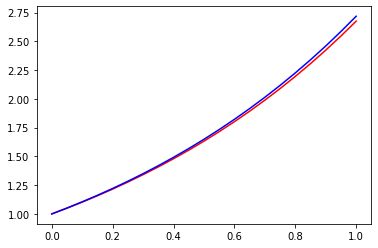

In [10]:
import numpy as np
import matplotlib.pyplot as graph

# Function Setup
f = lambda x, s: np.exp(x) # This is the differential equation
h = 0.05     # Increase stepsize for more precision
x = np.arange(0, 1+h, h)
s0 = 1

# Euler's Method
s = np.zeros(len(x))
s[0] = s0

for i in range(0, len(x) -1):
  s[i+1] = s[i] + h*f(x[i], s[i])   # Explicit Formula

# Graph and Comparing Estimation and Exact
graph.plot(x, s, 'r', label ='Eulers Method')   # Red line is estimation
graph.plot(x, np.exp(x), 'b', label ='Real Solution')  # Blue line is exact function
graph.show

Increasing the stepsize will generally increase the precision of the appoximation. Another approach to obtaining different estimates of the ordinary differential equation is to use different instances of Euler's Method. As stated above, what was used is known as the "Explicit Euler's Method". There similarily exists an "Implicit Euler's Method", in which tj+1 is used instead of tj. Note that because tj+1 is what is being approxiamted, the implicit formula only rarely has its uses.

S(tj+1) = S(tj) + (h)(F(tj+1,S(tj+1)))

Additionally, by taking the average of the explicit and implicit Euler's Method, we obtain what is commonly known as the "Trapezoidal Formula":

S(tj+1) = S(tj) + (h/2)(F(tj,S(tj)) + F(tj+1,S(tj+1)))
